2025-08-20 19:32:20.062601: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-20 19:32:20.067130: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-20 19:32:20.080602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755729140.098143  582682 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755729140.103192  582682 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755729140.119935  582682 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando mnist como dataset


/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


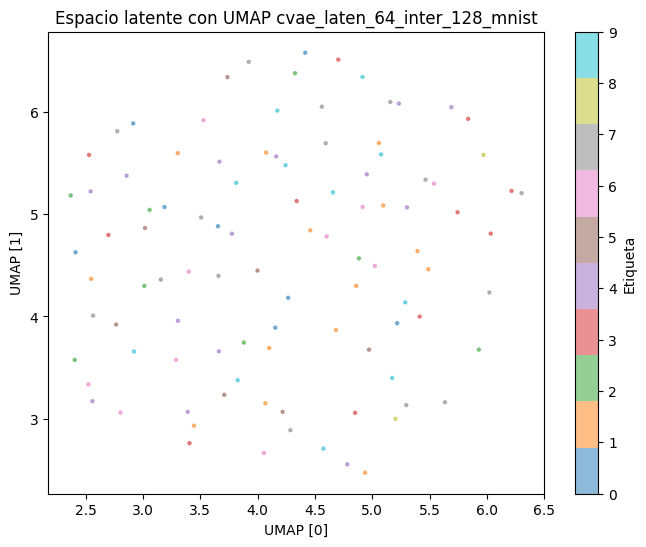

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../..")))
from experiments import load
import visualizations.visualizations as vis
import tensorflow as tf

dataset="mnist"

cvae = load.cvae(lat=64, inter=128, dataset=dataset)

data = load.data(dataset=dataset)

predictor = load.predictor(dataset=dataset)


x_train = data["x_train"]
x_test = data["x_test"]
y_train = data["y_train"]
y_test = data["y_test"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]

val_dataset = tf.data.Dataset.from_tensor_slices(((x_test, y_test), x_test))

vis.latent_space_umap(cvae, val_dataset, max_samples=1000,title= cvae.name)





inidicies 128,2 

inidicies 128,64 

inidicies 256,64 

inidicies 256,128 

inidicies 512,256 

inidicies 1024,256 



/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


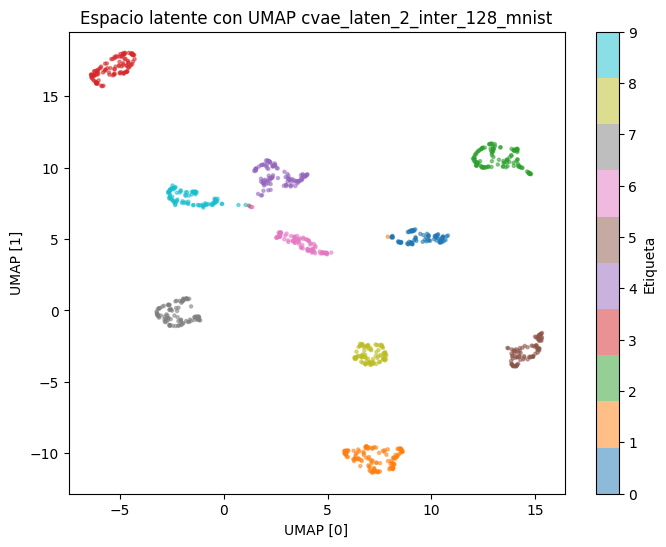

/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


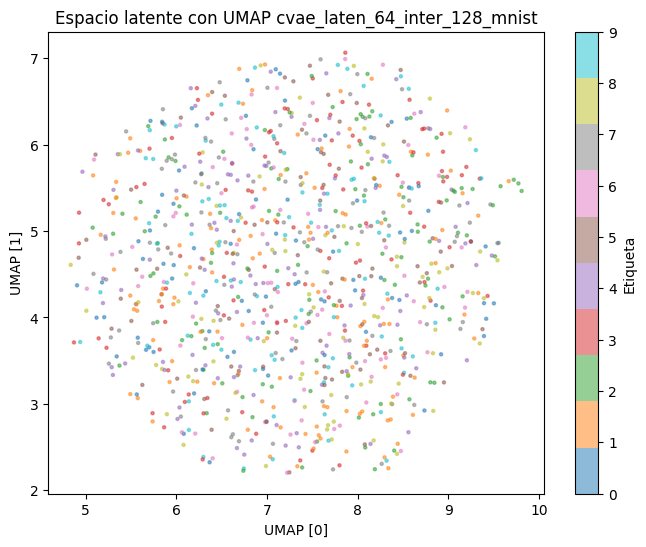

/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


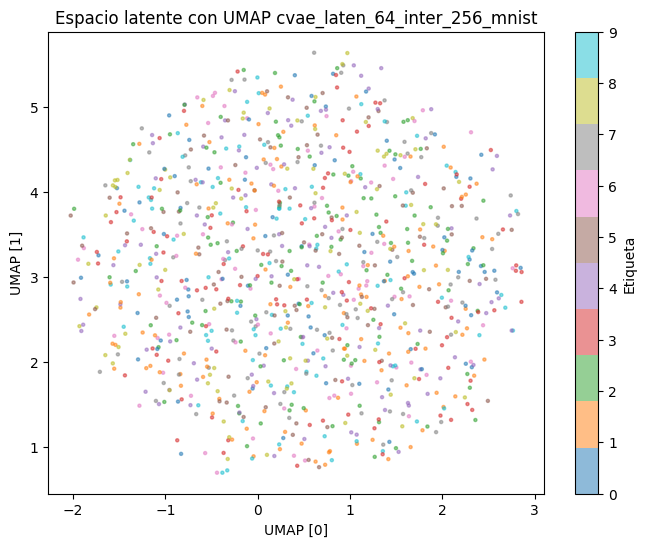

/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


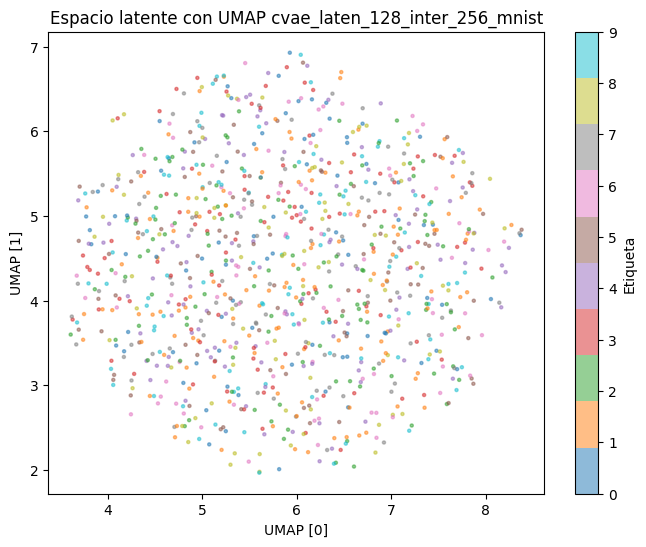

/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


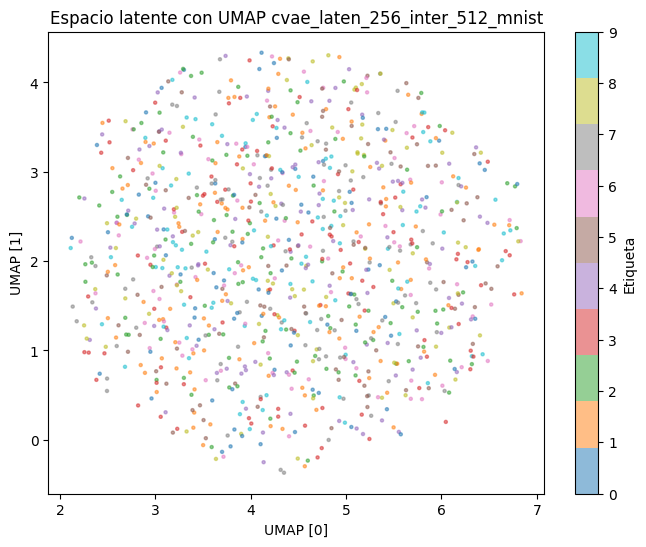

/home/santi/Escritorio/tesis/CROP_1/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


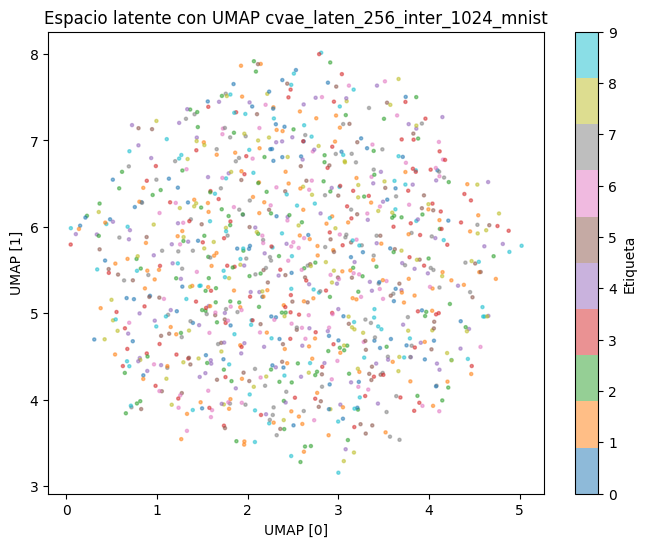

In [5]:
models = []

inter = [128,128,256,256,512,1024]
lat = [2,64,64,128,256,256]
dataset = "mnist"

for i, l in zip(inter,lat):
    print(f"inidicies {i},{l} \n")
    models.append(load.cvae(lat=l,inter=i,dataset=dataset))


for m in models:
    vis.latent_space_umap(m, val_dataset, max_samples=1000, save_path=f"figs/umap_latente_{m.name}.png" ,title=m.name)



Los gráficos no muestran espacios latentes con estructura. pero no parece afectar, al rendimiento a la hora de separa digitos. ¿Es un error de visaulización o de entrenamiento?
Los espacios latentes no tiene estrucutra dado que es la concatenación de z(64 128,...) y labels(10). En el caso de dim_lat = 2, los labels tienen mucho peso. y conforme crece el espacio latente los labels pierden peso. 